# Introduction to Python object oriented programming

## Motivating example

In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
depth = np.r_[100.0, 234.3, 345.12, 474.1]

In [16]:
porosity, flux = np.random.randn(4), 4.5 * np.random.randn(4)

In [17]:
well1 = {
    "depth": depth,
    "porosity": porosity,
    "n0_flux": flux,
    
    "units" : {
        "depth": "m",
        "porosity": "Ratio",
        "n0_flux": "Arbitrary Units"
    }
}

well2 = {
    "depth": depth,
    "porosity": None,
    "n0_flux": flux,
     "units" :{
         "depth": "m",
         "n0_flux": "Arbitrary Units"
     }
}

Calling Well.__del__


In [21]:
def plot_well(well, value, symbol="-", **kwargs):
    plt.ylabel("Depth [%s]" % well["units"]["depth"])
    plt.xlabel("%s [%s]" % (value, well["units"][value]))
    plt.plot(well[value], well["depth"], symbol, **kwargs)

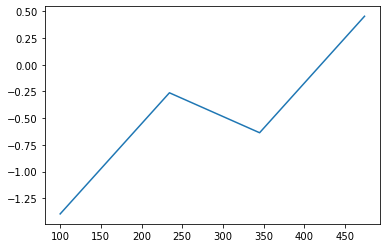

In [20]:
plt.plot(well1["depth"], well1["porosity"]);

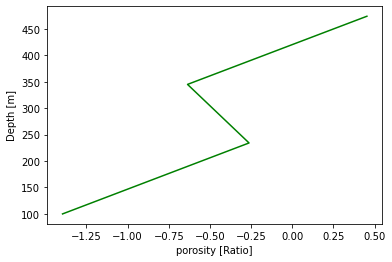

In [22]:
plot_well(well1, "porosity", color="green");

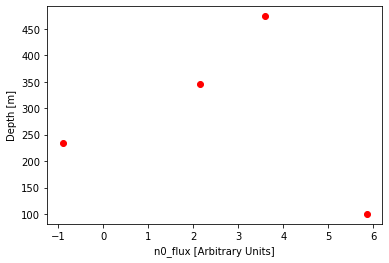

In [23]:
plot_well(well1, "n0_flux", symbol="o", color="red");

In [24]:
def interpolate_well(well, value, depths):
    ...

In [83]:
class WellData(object):
    pass

from copy import copy

class Well(object):
    units = {
        "depth": "m",
        "porosity": "Ratio",
        "n0_flux": "Arbitrary Units"
    }
    
    def __init__(self, depth, coord=None, data=None, id=None):
        print("Calling init.")
        self.depth, self.data, self.coord, self.id = depth, data, coord, id
        
    def plot(self, value, symbol="*", **kwargs):
        plt.ylabel("Depth [%s]" % self.units["depth"])
        plt.xlabel("%s [%s]" % (value, self.units[value]))
        plt.plot(self.data[value], self.depth, symbol, **kwargs)    
    
    def interpolate(self, value, depths):
        data = copy(self.data)
        data[value] = np.interp(depths, self.depth, self.data[value])
        
        return Well(
            depth=depths,
            coord=self.coord,
            data=data,
            id=self.id
        )
    
    def __str__(self):
        return "Well id: %s, at coordinates: %g, %g" \
               % (self.id, self.coord[0], self.coord[1])

    def __repr__(self):
        return self.__str__()

    """
    def __del__(self):
        print("Calling Well.__del__")
    """


In [31]:
Well

__main__.Well

In [29]:
type(Well)

type

In [84]:
well_1 = Well(depth, data={"porosity": porosity}, id=102, coord=(302.12, 1006.8))

Calling init.


In [71]:
Well.units

{'depth': 'm', 'porosity': 'Ratio', 'n0_flux': 'Arbitrary Units'}

In [42]:
type(well_1)

__main__.Well

In [43]:
well_1.depth, type(well_1.depth)

(array([100.  , 234.3 , 345.12, 474.1 ]), numpy.ndarray)

In [44]:
well_1.depth.min()

100.0

In [45]:
well_1.depth.shape, well_1.data["porosity"].shape

((4,), (4,))

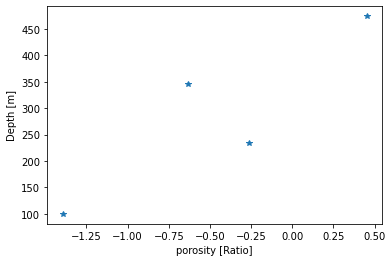

In [47]:
# Well.plot(well_1, "porosity")
well_1.plot("porosity")

In [54]:
print("%s" % well_1)

Well id: 102, at coordinates: 302.12, 1006.8


In [58]:
well_1

Well id: 102, at coordinates: 302.12, 1006.8

In [60]:
well_1.units

{'depth': 'm', 'porosity': 'Ratio', 'n0_flux': 'Arbitrary Units'}

In [67]:
well_2 = Well(depth, data={"n0_flux": flux}, id=103, coord=(100.12, 800.8))

Calling init.


In [62]:
well_1.units, well_2.units

({'depth': 'm', 'porosity': 'Ratio', 'n0_flux': 'Arbitrary Units'},
 {'depth': 'm', 'porosity': 'Ratio', 'n0_flux': 'Arbitrary Units'})

In [70]:
id(well_1)

140557747648688

In [69]:
id(well_1.units) == id(well_2.units)

True

In [39]:
Well.units

{'depth': 'm', 'porosity': 'Ratio', 'n0_flux': 'Arbitrary Units'}

In [87]:
d = np.r_[100.0:400:50j]
poro = well_1.interpolate("porosity", d)

Calling init.


In [80]:
well_1, poro

(Well id: 102, at coordinates: 302.12, 1006.8,
 Well id: 102, at coordinates: 302.12, 1006.8)

In [86]:
well_1.data, poro.data

({'porosity': array([-1.39541936, -0.26247273, -0.63615048,  0.45353131])},
 {'porosity': array([-1.39541936, -1.34377075, -1.29212215, -1.24047354, -1.18882493,
         -1.13717633, -1.08552772, -1.03387911, -0.9822305 , -0.9305819 ,
         -0.87893329, -0.82728468, -0.77563608, -0.72398747, -0.67233886,
         -0.62069026, -0.56904165, -0.51739304, -0.46574443, -0.41409583,
         -0.36244722, -0.31079861, -0.26380086, -0.28444536, -0.30508985,
         -0.32573435, -0.34637884, -0.36702334, -0.38766783, -0.40831233,
         -0.42895682, -0.44960132, -0.47024581, -0.49089031, -0.5115348 ,
         -0.5321793 , -0.55282379, -0.57346829, -0.59411278, -0.61475728,
         -0.63540177, -0.58630114, -0.53457591, -0.48285067, -0.43112543,
         -0.37940019, -0.32767496, -0.27594972, -0.22422448, -0.17249924])})

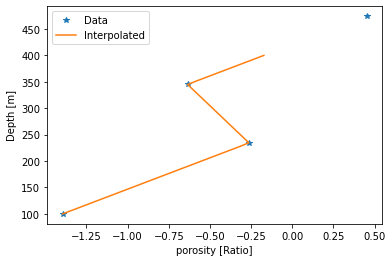

In [90]:
well_1.plot("porosity", label="Data")
poro.plot("porosity", symbol="-", label="Interpolated")
# plt.plot(poro, d, label="Interpolated")
plt.legend();

In [45]:
str(well1), well1.__str__()

('Well id: 102, at coordinates: 302.12, 1006.8',
 'Well id: 102, at coordinates: 302.12, 1006.8')

In [47]:
print(well1)

Well id: 102, at coordinates: 302.12, 1006.8


In [48]:
print("well1 is: %s" % well1)

well1 is: Well id: 102, at coordinates: 302.12, 1006.8


In [107]:
class Number(object):
    def __init__(self, num):
        self.num = num
    
    def __add__(self, other):
        return Number(self.num + other.num)
    
    def __sub__(self, other):
        return Number(self.num - other.num)
    
    def __mul__(self, other):
        return Number(self.num * other.num)
    
    def __eq__(self, other):
        return self.num == other.num
    
    def __str__(self):
        return "Number: %s" % self.num

In [108]:
a, b = Number(4), Number(3.0)

In [94]:
print(a, b)

Number: 4 Number: 3.0


In [98]:
well_1 + well_2

TypeError: unsupported operand type(s) for +: 'Well' and 'Well'

In [99]:
print(a + b)
print(a.__add__(b))

Number: 7.0
Number: 7.0


In [106]:
a.add(b).sub(c)
a + b - c

Number: 12.0


In [100]:
print(a - b)

Number: 1.0


In [106]:
print(a * b)

Number: 12.0


In [109]:
print(a == b)

False


In [77]:
type(a)

__main__.Number

In [78]:
a.num

4

In [79]:
a.num1 = 5

In [80]:
a.num1

5

In [81]:
array = np.r_[1, 2, 3]
array

array([1, 2, 3])

In [82]:
array.shape

(3,)

In [84]:
array.num = 1

AttributeError: 'numpy.ndarray' object has no attribute 'num'

In [88]:
class Pair(object):
    __slots__ = ("left", "right")
    
    def __init__(self, left, right):
        self.left, self.right = left, right

In [86]:
p = Pair(1.0, 2.0)

In [87]:
p.num = "a"

AttributeError: 'Pair' object has no attribute 'num'

In [90]:
p.left

1.0

In [89]:
Pair.__slots__

('left', 'right')

## Documentation

In [96]:
def fun(a, b):
    """
    Documentation:
    Adds two numbers.
    """
    return a + b

In [97]:
help(fun)

Help on function fun in module __main__:

fun(a, b)
    Documentation:
    Adds two numbers.



In [98]:
class Pair(object):
    """
    Pair of variables.
    """
    __slots__ = ("left", "right")
    
    def __init__(self, left, right):
        """
        Initialize Pair.
        """
        self.left, self.right = left, right

In [99]:
help(Pair)

Help on class Pair in module __main__:

class Pair(builtins.object)
 |  Pair(left, right)
 |  
 |  Pair of variables.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, left, right)
 |      Initialize Pair.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  left
 |  
 |  right



In [100]:
help(np.ndarray)

Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |

In [103]:
fun.__doc__

'\n    Documentation:\n    Adds two numbers.\n    '

In [104]:
dir(fun)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [106]:
dir(well1)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'coord',
 'data',
 'depth',
 'id',
 'interpolate',
 'plot',
 'units']

In [107]:
def apply(var, f):
    return f(var)

In [108]:
def add(x):
    return x + 1

In [109]:
apply(1.0, add)

2.0

In [110]:
apply(1.0, lambda x: x + 1)

2.0

In [111]:
apply(1.0, lambda x: 3 * x)

3.0

In [112]:
f = lambda x, y: x + y

In [113]:
f

<function __main__.<lambda>(x, y)>

In [114]:
f(1.0, 2.0)

3.0

In [115]:
def ff(x, y):
    return x + y

In [116]:
ff(1.0, 2.0)

3.0